# 기본설정

- 한글 폰트 설정하기

In [42]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

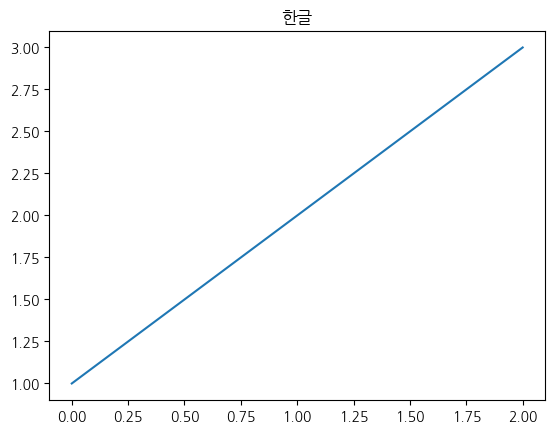

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# Google Colab 빅쿼리 연동

In [1]:
from google.colab import auth
auth.authenticate_user()

# 데이터 가져오기
- 공식문서 참조 : https://pandas.pydata.org/docs/reference/api/pandas.read_gbq.html

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
project_id = 'multi-telecom'
sql = '''
SELECT * FROM `multi-telecom.churn_rate.telecom_stats` LIMIT 7100
'''

df = pd.read_gbq(sql, project_id = project_id, dialect = 'standard')
df

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChurnCategory_Dissatisfaction,ChurnCategory_Other,ChurnCategory_Price,Service_Num,Age_Group_Under_20,Age_Group_20_30,Age_Group_30_40,Age_Group_40_50,Age_Group_50_65,Age_Group_Over65
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,15,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,4,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,68,1,1,1,1,1,1,1,...,0,0,0,12,0,0,0,0,1,0
7039,1,1,70,1,1,1,0,1,1,1,...,0,0,0,12,0,0,1,0,0,0
7040,0,0,63,1,1,1,0,1,1,1,...,0,0,0,12,0,0,0,1,0,0
7041,0,0,57,1,1,1,0,1,1,1,...,0,0,0,12,0,1,0,0,0,0


## 데이터 정의

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              7043 non-null   Int64  
 1   Dependents                          7043 non-null   Int64  
 2   tenure                              7043 non-null   Int64  
 3   PhoneService                        7043 non-null   Int64  
 4   MultipleLines                       7043 non-null   Int64  
 5   InternetService                     7043 non-null   Int64  
 6   OnlineSecurity                      7043 non-null   Int64  
 7   OnlineBackup                        7043 non-null   Int64  
 8   DeviceProtection                    7043 non-null   Int64  
 9   TechSupport                         7043 non-null   Int64  
 10  StreamingTV                         7043 non-null   Int64  
 11  StreamingMovies                     7043 no

# 요인분석
- Satisfaction Score : 회사에 대한 고객의 만족도 점수 (5점 척도) 에 대한 요인분석 진행.
- 요인분석은 독립변수와 종속변수를 나눠서 진행하지 않으며, 독립변수들간의 관계를 알아보는 분석임.

## 컬럼 정리

In [6]:
df = df.drop(['ChurnReason'], axis = 1)

In [7]:
df['TotalCharges'].fillna(0, inplace=True)

## 표준화 스케일링

In [8]:
!pip install factor_analyzer

In [51]:
df['SatisfactionScore'].value_counts()

3    2665
4    1789
5    1149
1     922
2     518
Name: SatisfactionScore, dtype: Int64

In [9]:
df1 = pd.get_dummies(df, columns=['SatisfactionScore'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              7043 non-null   Int64  
 1   Dependents                          7043 non-null   Int64  
 2   tenure                              7043 non-null   Int64  
 3   PhoneService                        7043 non-null   Int64  
 4   MultipleLines                       7043 non-null   Int64  
 5   InternetService                     7043 non-null   Int64  
 6   OnlineSecurity                      7043 non-null   Int64  
 7   OnlineBackup                        7043 non-null   Int64  
 8   DeviceProtection                    7043 non-null   Int64  
 9   TechSupport                         7043 non-null   Int64  
 10  StreamingTV                         7043 non-null   Int64  
 11  StreamingMovies                     7043 no

In [11]:
df1['SatisfactionScore_1'] = df1['SatisfactionScore_1'].astype(int)
df1['SatisfactionScore_2'] = df1['SatisfactionScore_2'].astype(int)
df1['SatisfactionScore_3'] = df1['SatisfactionScore_3'].astype(int)
df1['SatisfactionScore_4'] = df1['SatisfactionScore_4'].astype(int)
df1['SatisfactionScore_5'] = df1['SatisfactionScore_5'].astype(int)

In [15]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

selected_columns = ["SatisfactionScore_1", 'SatisfactionScore_2', 'SatisfactionScore_3', 'SatisfactionScore_4', 'SatisfactionScore_5', 'Churn']
df1 = df1[selected_columns]

factor_analyzer = FactorAnalyzer(n_factors=4, rotation="varimax")

factor_analyzer.fit(df1)

loadings = pd.DataFrame(factor_analyzer.loadings_, index=df1.columns)
print("Loadings:\n", loadings)

explained_variance = factor_analyzer.get_factor_variance()
print("Explained Variance:\n", explained_variance)

Loadings:
                             0         1         2         3
SatisfactionScore_1  0.987869 -0.028117 -0.131168 -0.043415
SatisfactionScore_2  0.020264 -0.006268  0.996663 -0.040896
SatisfactionScore_3 -0.331799  0.802429 -0.225878 -0.437697
SatisfactionScore_4 -0.289750 -0.892982 -0.175813 -0.289816
SatisfactionScore_5 -0.139252  0.028883 -0.080760  0.984465
Churn                0.710956  0.117196  0.451090 -0.135423
Explained Variance:
 (array([1.69519163, 1.45670726, 1.3024764 , 1.26664023]), array([0.28253194, 0.24278454, 0.2170794 , 0.2111067 ]), array([0.28253194, 0.52531648, 0.74239588, 0.95350259]))


## 결과

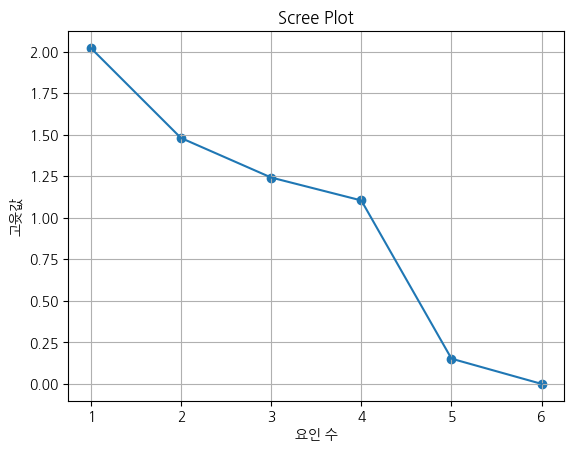

In [13]:
ev, v = factor_analyzer.get_eigenvalues()
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('요인 수')
plt.ylabel('고윳값')
plt.grid()
plt.show()

**Explained Variance:
 (array([1.69519163, 1.45670726, 1.3024764 , 1.26664023]), array([0.28253194, 0.24278454, 0.2170794 , 0.2111067 ]), array([0.28253194, 0.52531648, 0.74239588, 0.95350259]))**
<br>
<br>

**구분**

- 전체 고유값의 배열 (Eigenvalues): [1.69519163, 1.45670726, 1.3024764 , 1.26664023]
- 요인별 설명된 분산의 배열 (Explained Variance per Factor): [0.28253194, 0.24278454, 0.2170794 , 0.2111067 ]
- 누적된 설명된 분산의 배열 (Cumulative Explained Variance): [0.28253194, 0.52531648, 0.74239588, 0.95350259]
<br>
<br>

**해석**
- 전체 고유값 배열: 요인의 개수에 따른 고유값이 나열됨. 고유값은 각 요인이 설명하는 데이터의 분산을 나타내며, 높은 고유값은 해당 요인이 중요하게 작용함을 의미.

- 요인별 설명된 분산 배열: 각 요인이 설명하는 분산의 비율이 나열됨.

  첫번째 요인은 전체 분산의 약 28%, 두번째 요인은 약 24%, 세번째 요인은 약 22%, 네번째 요인은 약 21%로 4개의 요인으로 설명이 가능함.

- 누적된 설명된 분산 배열: 각 요인이 추가됨에 따라 누적된 설명된 분산의 비율이 나열됨. 네 번째 요인을 포함하면, 약 95%의 전체 분산이 설명됨.

**요인별 해석**

- Factor 0 :

  "SatisfactionScore_1"에 대해서 강한 긍정적인 영향을 받음.

  "SatisfactionScore_2", "SatisfactionScore_3", "SatisfactionScore_4", "SatisfactionScore_5"에 대해서 부정적인 영향이 있지만, 크지 않음.

  "Churn"에 대해서 강한 긍정적인 영향을 받음.
- Factor 1 :

  "SatisfactionScore_1", "SatisfactionScore_2"에 대해서 부정적인 영향이 있지만, 크지 않음.

  "SatisfactionScore_3"에 대해서 강한 긍정적인 영향을 받음.

  "SatisfactionScore_4"에 대해서 강한 부정적인 영향을 받음.

  "SatisfactionScore_5"에 대해서 긍정적인 영향이 있지만, 크지 않음.

  "Churn"에 대해서 긍정적인 영향이 있지만, 크지 않음.
- Factor 2 :

  "SatisfactionScore_1", "SatisfactionScore_3", "SatisfactionScore_4", "SatisfactionScore_5"에 대해서 부정적인 영향이 있지만, 크지 않음.

  "SatisfactionScore_2"에 대해서 강한 긍정적인 영향을 받음.

  "Churn"에 대해서 부정적인 영향이 있지만, 크지 않음.
- Factor 3 :

  "SatisfactionScore_1"에 대해서 부정적인 영향이 있지만, 크지 않음.

  "SatisfactionScore_2"에 대해서 긍정적인 영향이 있지만, 크지 않음.

  "SatisfactionScore_3", "SatisfactionScore_4", "SatisfactionScore_5"에 대해서 강한 부정적인 영향을 받음.

  "Churn"에 대해서 부정적인 영향이 있지만, 크지 않음.

# 결론
- 요인분석을 통해 각 요인별로 만족도 점수가 어떤 상관관계를 보이는지 확인함.
- Factor 0 는 "SatisfactionScore_1"이 큰 영향을 주며, "Churn"과 양적인 관계를 가짐.
- Factor 1 은 "SatisfactionScore_3"이 큰 영향을 주며, "SatisfactionScore_4"와 "Churn"과 양적인 관계를 가짐.
- Factor 2 는 "SatisfactionScore_2"가 큰 영향을 주며, "Churn"과 부정적인 관계를 가짐.
- Factor 3 은 "SatisfactionScore_3", "SatisfactionScore_4", "SatisfactionScore_5"가 큰 영향을 주며, "Churn"과 강한 부정적인 관계를 가짐.
<br>
<br>

=> **즉, Factor 0은 이탈성을 높게 보이고, Factor 1은 유지보단 이탈율이 조금 더 높게 나오며, Factor 2와 Factor 3는 이탈성을 낮게 보임.**